
Data loaded successfully
   Execution_Id   Task_Id Developer     LLM  Story_Points  Prompt_Iterations  \
0             1  29682716      Dev1  GPT-4o             1                 22   
1             2  28955401      Dev2  GPT-4o             4                 22   
2             3  33580804      Dev3  GPT-4o            24                 76   
3             4  91102633      Dev4  GPT-4o             8                 30   
4             5  89191553      Dev5  GPT-4o             1                 20   

   Corrective_Prompts  Context_Prompts  Modified_Files  Validation_Detected  \
0                   5                5               3                   15   
1                   5                5               3                   17   
2                  17               20               8                   39   
3                   5                6               4                   22   
4                   5                5               3                   15   

   Manual_Correcti

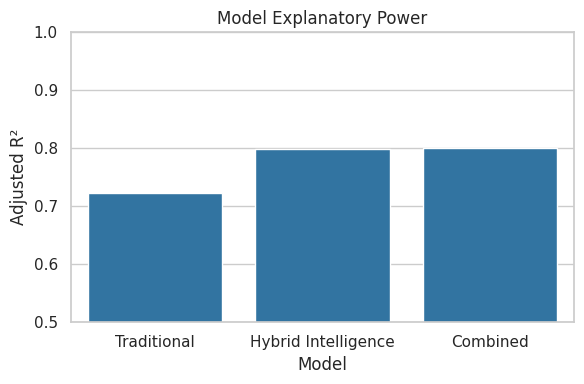

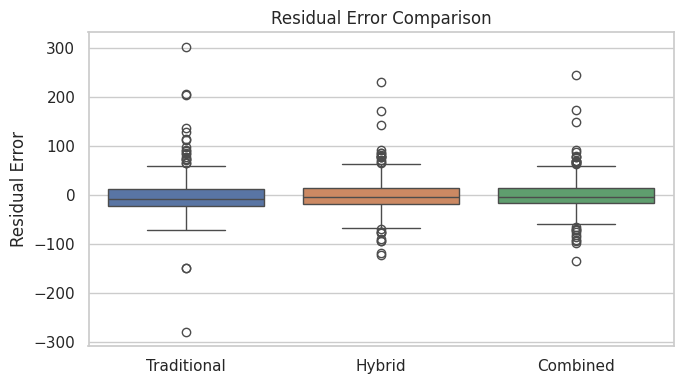

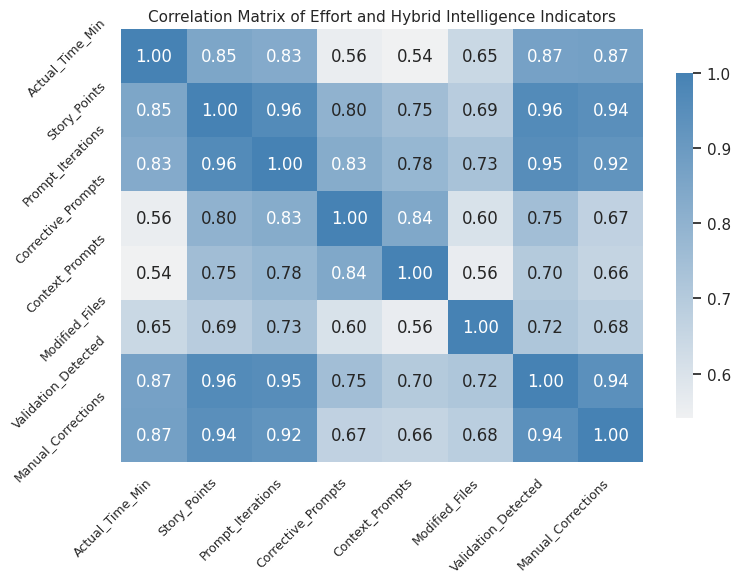

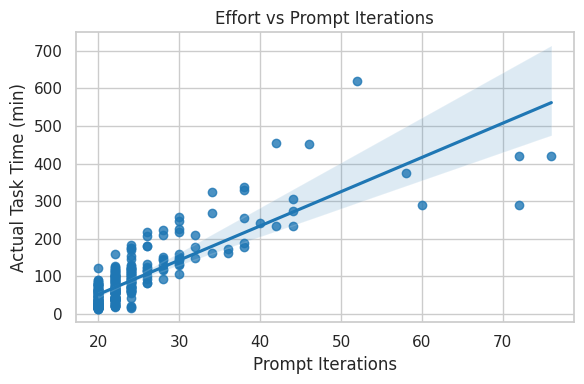

In [ ]:
# ============================================================
# Empirical Analysis of LLM-Assisted Software Effort
# Research Questions: RQ1 – RQ3
# ============================================================

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")

# ------------------------------------------------------------
# 1. LOAD DATA
# ------------------------------------------------------------

CSV_PATH = "Task_execution_observations.csv"
df = pd.read_csv(CSV_PATH)

# Ensure correct data types
df["Developer"] = df["Developer"].astype("category")
df["Task_Id"] = df["Task_Id"].astype("category")
df["LLM"] = df["LLM"].astype("category")

print("\nData loaded successfully")
print(df.head())
print("\nTotal records:", len(df))




# ============================================================
# RQ2 – HYBRID INTELLIGENCE VS TRADITIONAL ESTIMATION
# ============================================================

print("\n==============================")
print("RQ2 – Hybrid Intelligence vs Traditional Models")
print("==============================")

hie_vars = [
    "Prompt_Iterations",
    "Corrective_Prompts",
    "Context_Prompts",
    "Modified_Files",
    "Validation_Detected",
    "Manual_Corrections"
]

# --- Model A: Traditional
model_A = smf.ols(
    "Actual_Time_Min ~ Story_Points",
    data=df
).fit()

# --- Model B: Hybrid Intelligence
model_B = smf.ols(
    "Actual_Time_Min ~ " + " + ".join(hie_vars),
    data=df
).fit()

# --- Model C: Combined
model_C = smf.ols(
    "Actual_Time_Min ~ Story_Points + " + " + ".join(hie_vars),
    data=df
).fit()

# --- Model comparison
comparison = pd.DataFrame({
    "Model": ["Traditional", "Hybrid Intelligence", "Combined"],
    "Adjusted_R2": [
        model_A.rsquared_adj,
        model_B.rsquared_adj,
        model_C.rsquared_adj
    ],
    "AIC": [model_A.aic, model_B.aic, model_C.aic],
    "BIC": [model_A.bic, model_B.bic, model_C.bic]
})

print("\nModel Comparison Table:")
print(comparison)

# --- Likelihood Ratio Tests
print("\nLikelihood Ratio Test: Traditional vs Hybrid")
print(anova_lm(model_A, model_B))

print("\nLikelihood Ratio Test: Traditional vs Combined")
print(anova_lm(model_A, model_C))

# --- Figure RQ2.1: Explanatory Power
plt.figure(figsize=(6, 4))
sns.barplot(
    x="Model",
    y="Adjusted_R2",
    data=comparison,
     color="tab:blue",
)
plt.ylim(0.5, 1.0)
plt.ylabel("Adjusted R²")
plt.title("Model Explanatory Power")
plt.tight_layout()
plt.show()

# --- Figure RQ2.2: Residual Error Comparison
residuals = pd.DataFrame({
    "Traditional": model_A.resid,
    "Hybrid": model_B.resid,
    "Combined": model_C.resid
})

plt.figure(figsize=(7, 4))
sns.boxplot(data=residuals)
plt.ylabel("Residual Error")
plt.title("Residual Error Comparison")
plt.tight_layout()
plt.show()

# --- Correlation Matrix (Reviewer favorite)
corr_vars = ["Actual_Time_Min", "Story_Points"] + hie_vars
corr = df[corr_vars].corr()

plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap=sns.light_palette("steelblue", as_cmap=True),
    cbar_kws={"shrink": 0.8}
)


# --- Axis tick labels: 45 degrees & smaller font
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    ha="right",
    fontsize=9
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=45,
    va="center",
    fontsize=9
)

# --- Title (slightly reduced size)
plt.title(
    "Correlation Matrix of Effort and Hybrid Intelligence Indicators",
    fontsize=11
)

plt.tight_layout()
plt.show()


# --- Figure RQ2.4: Effort vs Prompt Iterations
plt.figure(figsize=(6, 4))
sns.regplot(
    x="Prompt_Iterations",
    y="Actual_Time_Min",
    data=df,
     color="tab:blue",
    ci=95
)
plt.xlabel("Prompt Iterations")
plt.ylabel("Actual Task Time (min)")
plt.title("Effort vs Prompt Iterations")
plt.tight_layout()
plt.show()